# Tobigs 24기 2주차 정규세션 Ensemble 과제

# 과제1. High variance/bias

## Q1. High variance의 정의 및 문제점에 대해 설명해주세요.

정의: High variance는 모델이 학습 데이터의 세부 패턴과 노이즈까지 과도하게 학습(overfitting)하는 상태를 의미합니다.

문제점: 학습 데이터에서는 높은 정확도를 보이지만, 새로운 데이터(테스트셋)에서는 성능이 급격히 떨어집니다. 즉, 일반화 능력이 부족합니다.

## Q2. High bias의 정의 및 문제점에 대해 설명해주세요.

정의: High bias는 모델이 너무 단순하여 데이터의 중요한 패턴을 충분히 학습하지 못하는 상태(underfitting)를 의미합니다.

문제점: 학습 데이터와 테스트 데이터 모두에서 낮은 성능을 보이며, 복잡한 관계를 포착하지 못합니다.

## Q3. High variance 와 high bias를 다룰때 적합한 ensemble 방식과 그 이유를 적어주세요.

High variance → Bagging 기법(예: Random Forest)

이유: 서로 다른 데이터 샘플로 학습한 여러 모델의 예측을 평균 내어 분산을 줄이고, 안정적인 예측을 가능하게 합니다.

High bias → Boosting 기법(예: Gradient Boosting, XGBoost)

이유: 약한 학습기를 순차적으로 학습시키면서 이전 모델이 틀린 부분을 보완하여 점차 복잡한 패턴까지 학습하게 합니다.

# 과제2. Ensemble 실습

데이터 출처: https://www.kaggle.com/sakshigoyal7/credit-card-customers

## 목표 : 은행 신용 카드 서비스 이탈 고객 예측 모델
### 칼럼 설명
```
[features]
 - Customer_Age : 고객의 나이
 - Gender : 성별 (M=Male, F=Female)
 - Dependent_count : 부양하는 가족의 수
 - Education_Level : 고객의 최종 학력 (example: high school, college graduate, etc.)
 - Marital_Status : 결혼 상태 (Married, Single, Divorced, Unknown)
 - Income_Category : 소득 범주 (< $40K, $40K - 60K, $60K - $80K, $80K-$120K, etc.)
 - Card_Category : 카드 종류 (Blue, Silver, Gold, Platinum)
 - Months_on_book : 은행과의 관계 기간 (개월 수)
 - Total_Relationship_Count : 고객이 보유한 전체 제품 수
 - Months_Inactive_12_mon : 최근 12개월 동안 비활성화된 개월 수
 - Contacts_Count_12_mon : 최근 12개월 동안의 연락 횟수
 - Credit_Limit : 신용 카드의 신용 한도
 - Total_Revolving_Bal : 신용 카드의 총 회전 잔액
 - Avg_Open_To_Buy : 구매 가능 신용 한도 (최근 12개월 평균)
 - Total_Amt_Chng_Q4_Q1 : 거래 금액 변화율 (4분기 대비 1분기)
 - Total_Trans_Amt :  총 거래 금액 (지난 12개월)
 - Total_Trans_Ct : 총 거래 횟수 (지난 12개월)
 - Total_Ct_Chng_Q4_Q1 : 거래 횟수 변화율 (4분기 대비 1분기)
 - Avg_Utilization_Ratio : 평균 카드 이용 비율

[target]
 - Attrition_Flag : 고객 활동 변수 / Existing Customer - 0, Attrited Customer - 1

```


### 데이터 불러오기

In [1]:
!pip install kagglehub

In [2]:
import kagglehub
import pandas as pd
import os

path = kagglehub.dataset_download("sakshigoyal7/credit-card-customers")

print("Path to dataset files:", path)

# kagglehub로 받은 경로에서 csv 파일 경로 찾기
csv_path = os.path.join(path, "BankChurners.csv")

# 데이터 불러오기
df = pd.read_csv(csv_path)

# Feature 21 & 22의 경우 데이터 셋에서 삭제하는 것을 추천하는 문구 발견, 삭제
print(len(df.columns))
df.drop(df.columns[[21, 22]], axis = 1, inplace = True) # inplace = True 데이터 원본에서 처리 not copy
print(len(df.columns))

# 데이터 확인
df.head()

Path to dataset files: /kaggle/input/credit-card-customers
23
21


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

## EDA & Preprocessing

In [4]:
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

### 결측치 확인

In [5]:
df.isna().sum()

,0
CLIENTNUM,0
Attrition_Flag,0
Customer_Age,0
Gender,0
Dependent_count,0
Education_Level,0
Marital_Status,0
Income_Category,0
Card_Category,0
Months_on_book,0


### 범주형 데이터 확인 + Unknown 처리

In [6]:
categorical_columns = df.select_dtypes(include=['object']).columns

# Printing unique values for each categorical column
for column in categorical_columns:
    unique_values = df[column].unique()
    print(f"Column: {column}")
    print(f"Unique Values: {unique_values}\n")

Column: Attrition_Flag
Unique Values: ['Existing Customer' 'Attrited Customer']

Column: Gender
Unique Values: ['M' 'F']

Column: Education_Level
Unique Values: ['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']

Column: Marital_Status
Unique Values: ['Married' 'Single' 'Unknown' 'Divorced']

Column: Income_Category
Unique Values: ['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']

Column: Card_Category
Unique Values: ['Blue' 'Gold' 'Silver' 'Platinum']



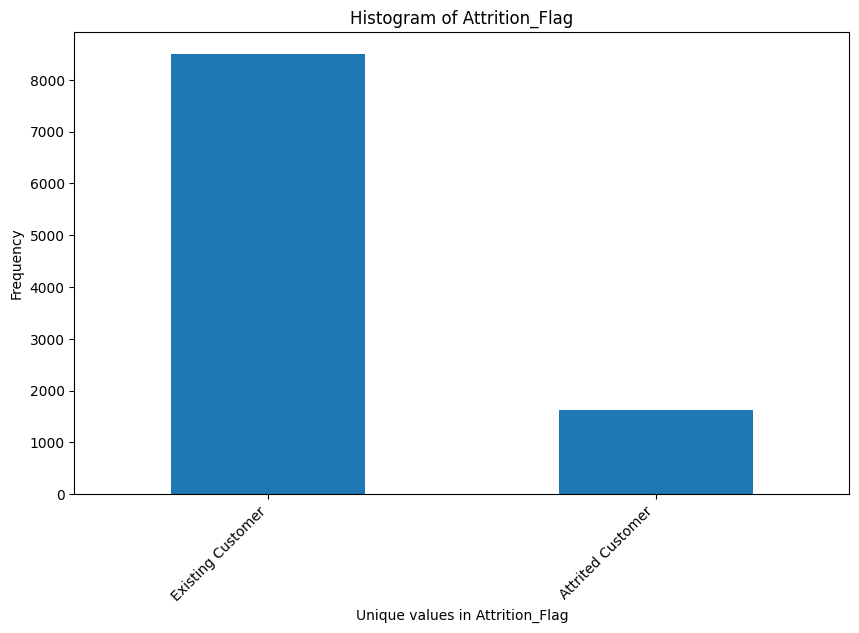

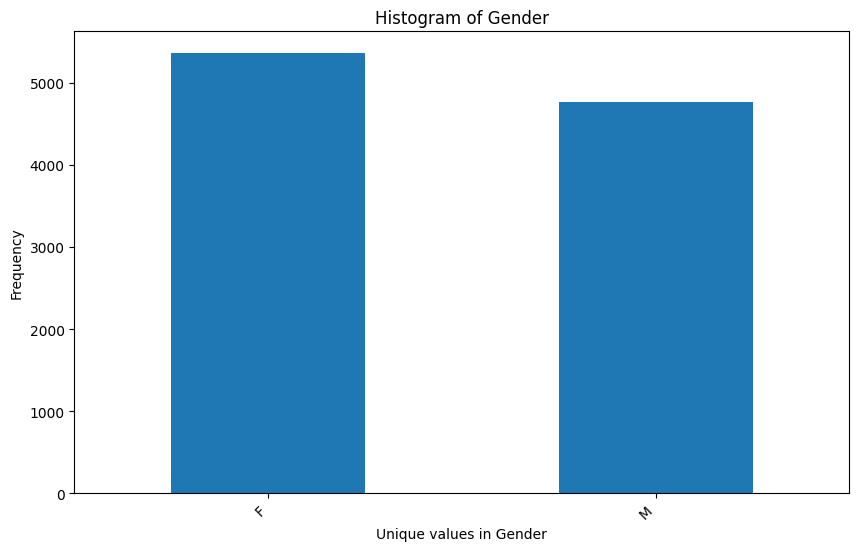

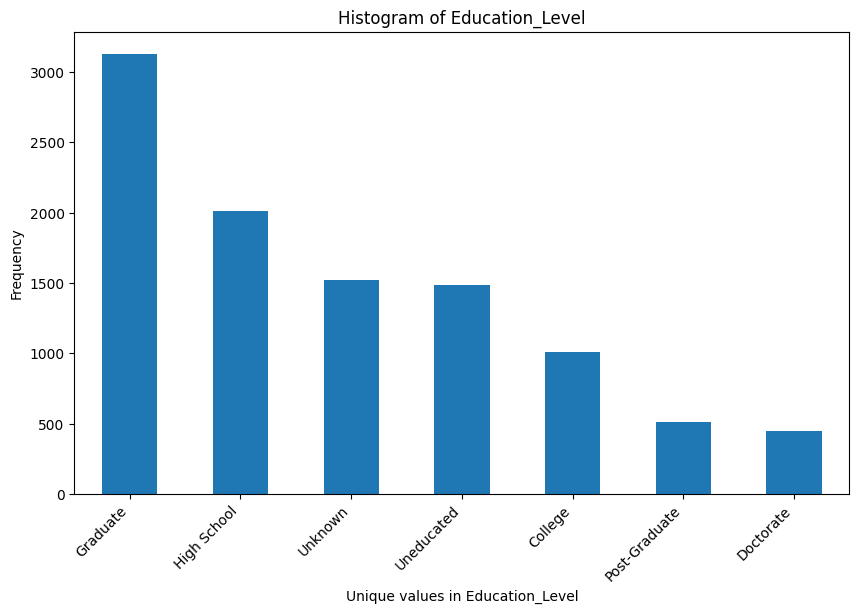

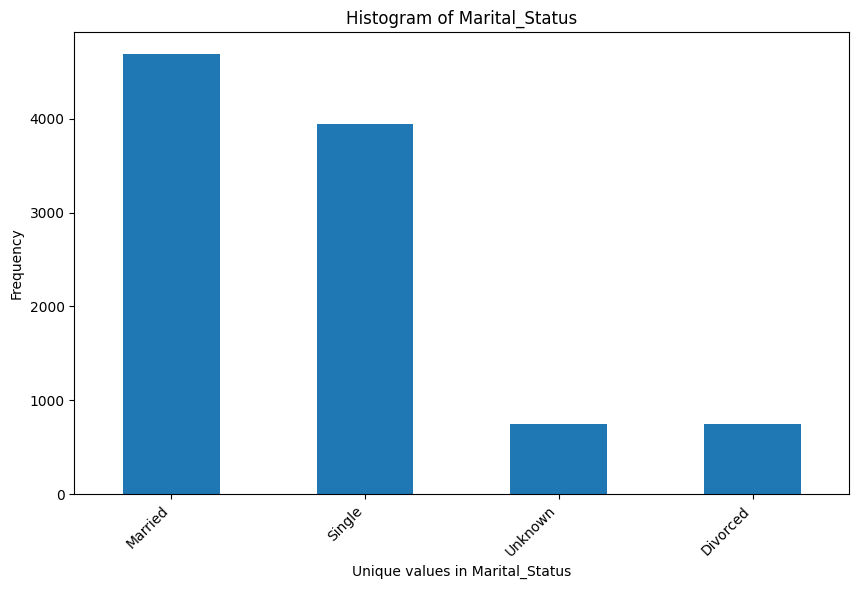

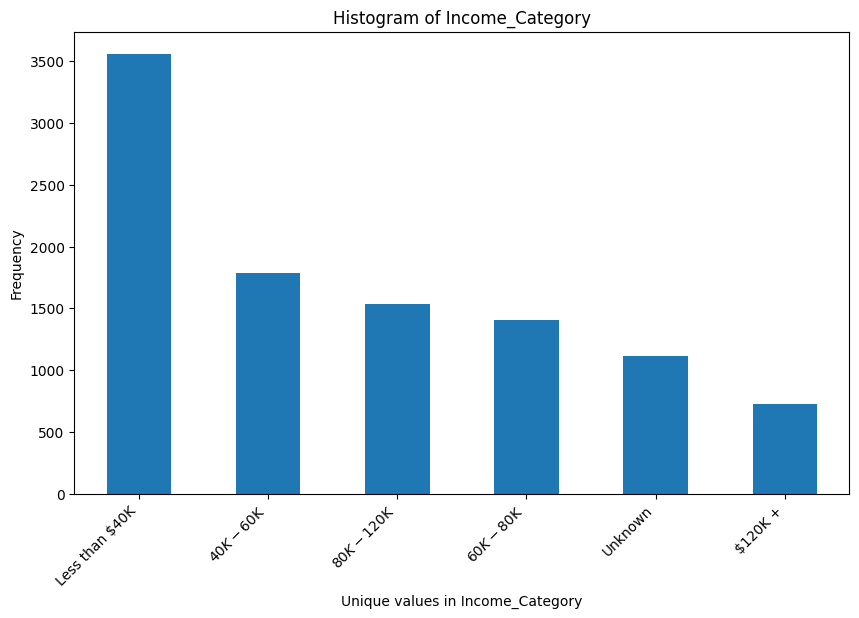

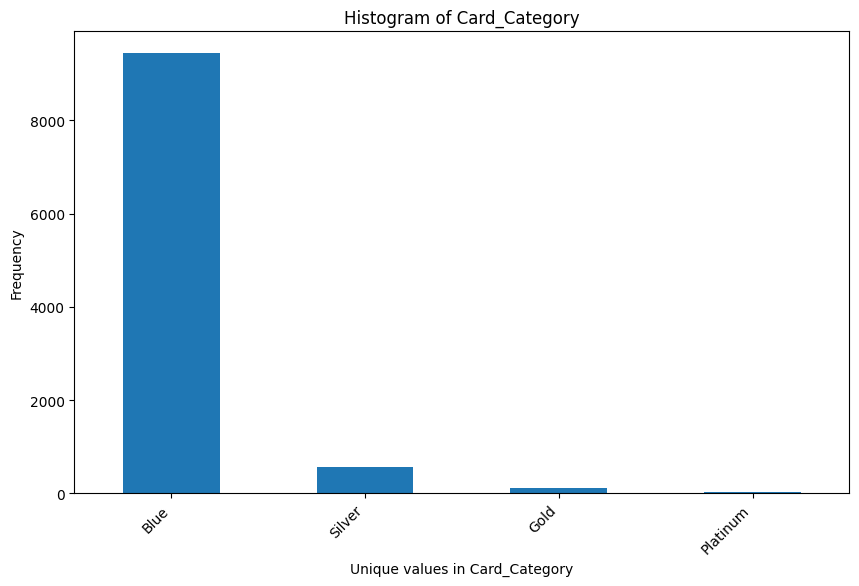

In [7]:
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    df[column].value_counts().plot(kind='bar')
    plt.title(f"Histogram of {column}")
    plt.xlabel(f"Unique values in {column}")
    plt.ylabel("Frequency")
    plt.xticks(rotation=45, ha='right')
    plt.show()

EDA 결과 Unknown값이 존재, 해당 비율이 적지 않으므로 제거하기보다는 대체

In [8]:
def replace_unknowns(df):
    df_encoded = df.copy()

    # 범주형 변수를 인코딩하기 위해 LabelEncoder를 적용
    label_encoders = {}
    for column in df_encoded.columns:
        if df_encoded[column].dtype == 'object' and df_encoded[column].nunique() < 20:
            le = LabelEncoder()
            df_encoded[column] = le.fit_transform(df_encoded[column].astype(str))
            label_encoders[column] = le

    for target_column in df.columns:
        # Unknown 값이 있는 행과 없는 행을 구분
        unknown_mask = df[target_column] == 'Unknown'
        known_mask = ~unknown_mask

        # Unknown 값이 없다면 해당 열을 건너뜀
        if unknown_mask.sum() == 0:
            continue

        # target 변수에 따라 회귀나 분류 모델 선택
        if df[target_column].dtype == 'object' or df[target_column].nunique() < 20:
            model = RandomForestClassifier()
        else:
            model = RandomForestRegressor()

        # Unknown이 아닌 값으로 모델 훈련
        X = df_encoded.loc[known_mask].drop(columns=[target_column])
        y = df_encoded.loc[known_mask, target_column]
        model.fit(X, y)

        # Unknown 값 예측
        X_unknown = df_encoded.loc[unknown_mask].drop(columns=[target_column])
        predictions = model.predict(X_unknown)

        # 예측된 값으로 Unknown 대체 (범주형인 경우 역변환)
        if target_column in label_encoders:
            predictions = label_encoders[target_column].inverse_transform(predictions)
        df.loc[unknown_mask, target_column] = predictions

    return df


# 'Unknown' 값을 대체
df_filled = replace_unknowns(df)

df_filled.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Married,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


다른 열과의 관계를 고려하여 Unkonwn값을 예측하는 방식으로 처리(RF모델 이용)

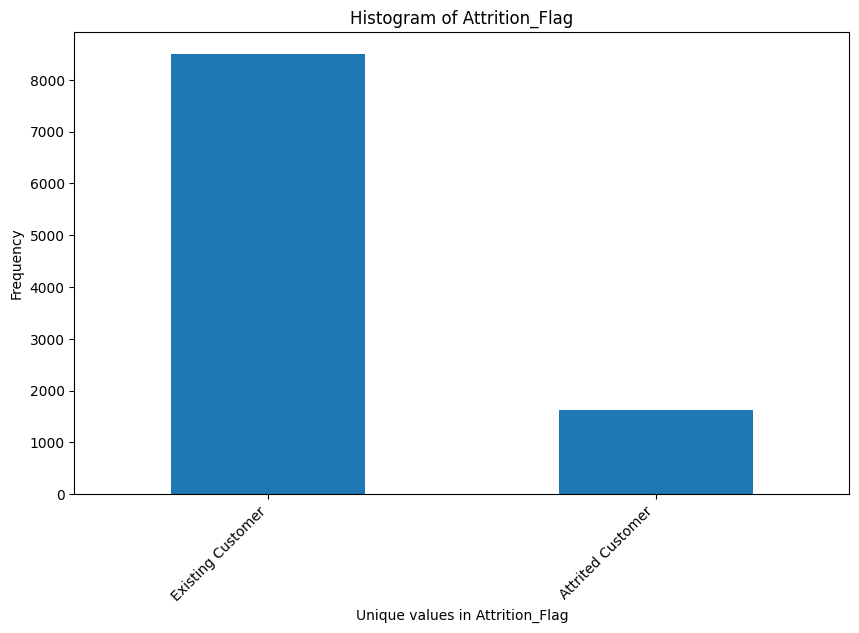

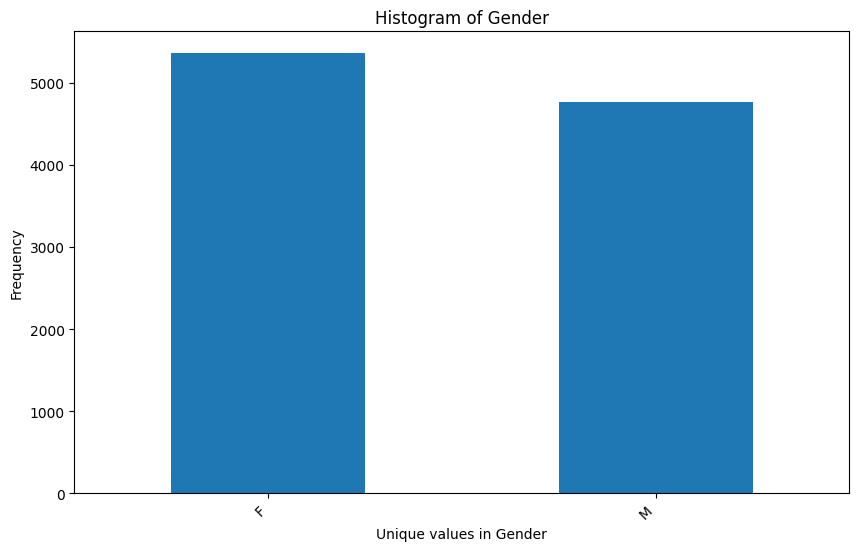

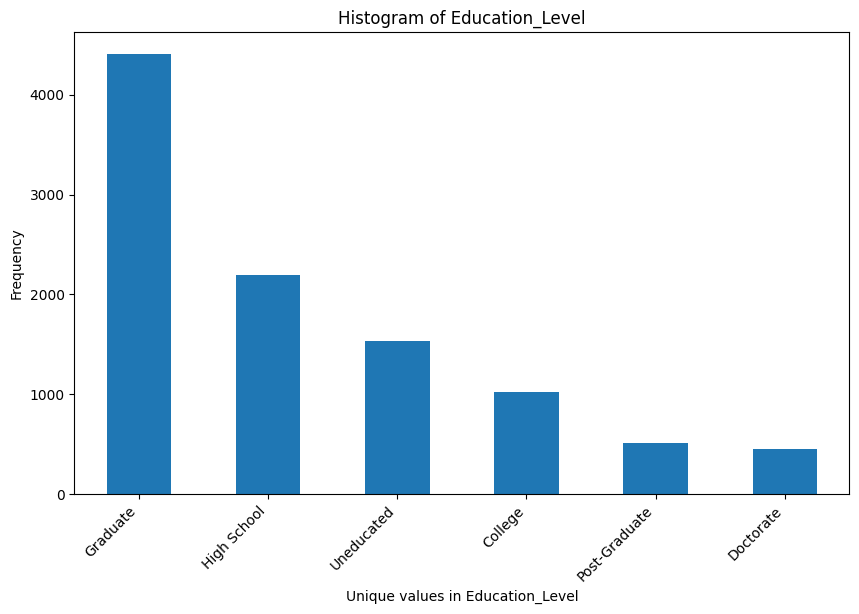

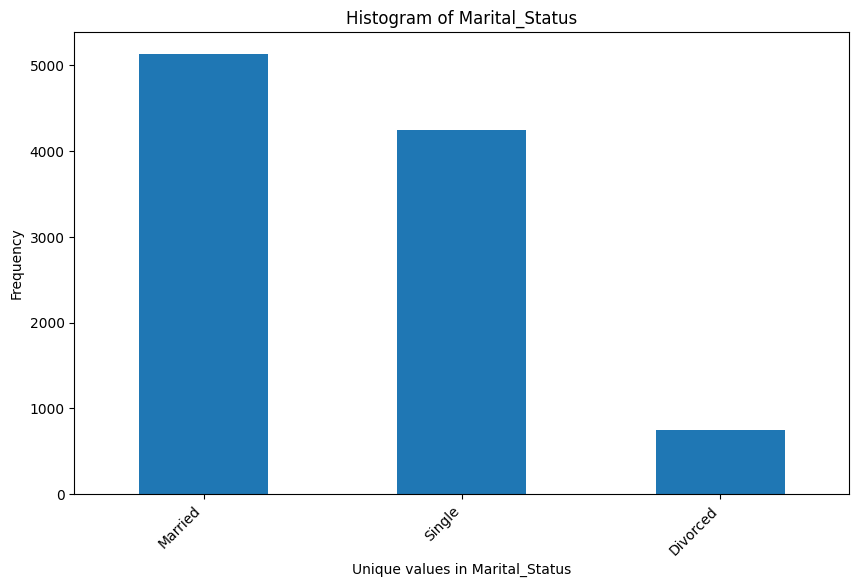

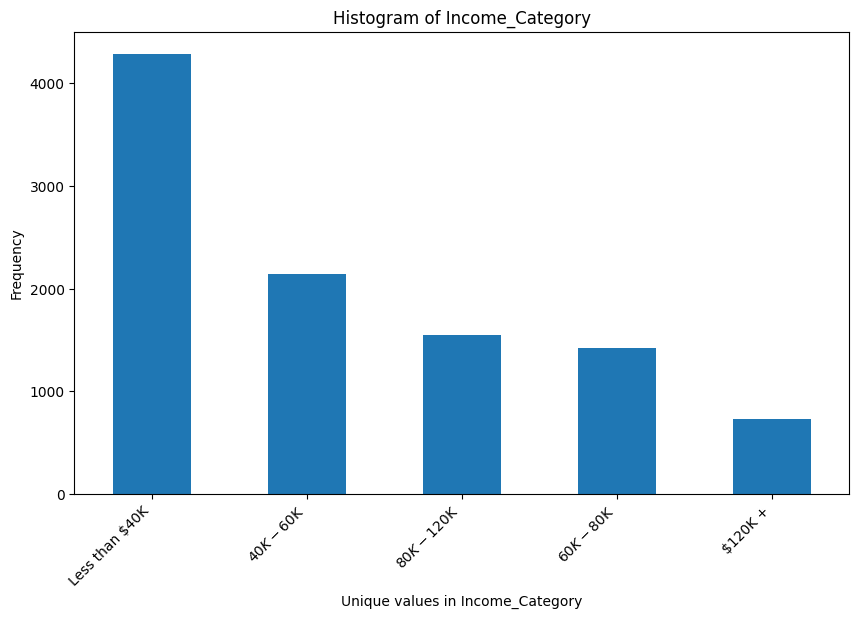

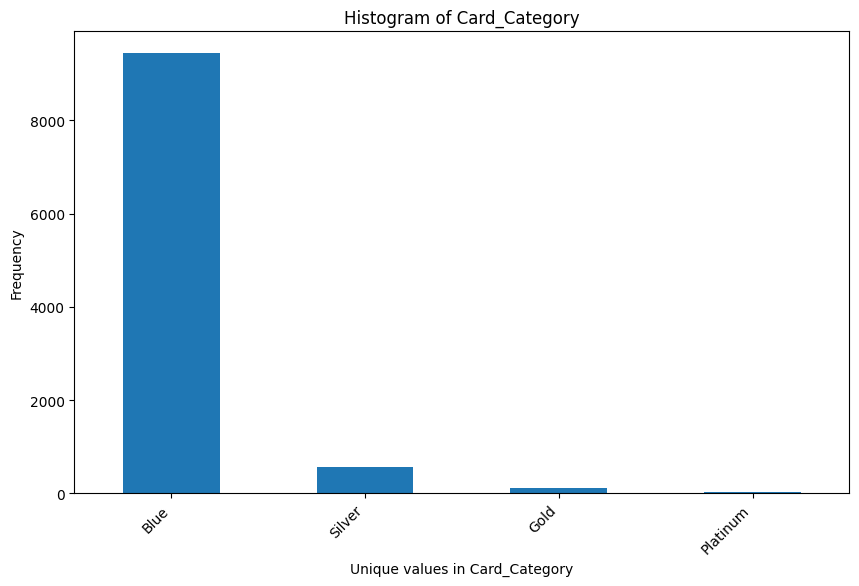

In [9]:
categorical_columns = df_filled.select_dtypes(include=['object']).columns

for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    df[column].value_counts().plot(kind='bar')
    plt.title(f"Histogram of {column}")
    plt.xlabel(f"Unique values in {column}")
    plt.ylabel("Frequency")
    plt.xticks(rotation=45, ha='right')
    plt.show()

### Label encoding

In [10]:
def get_ordered_mappings(df):
    mappings = {
        'Education_Level': {
            'Uneducated': 0,
            'High School': 1,
            'College': 2,
            'Graduate': 3,
            'Post-Graduate': 4,
            'Doctorate': 5
        },
        'Income_Category': {
            'Less than $40K': 0,
            '$40K - $60K': 1,
            '$60K - $80K': 2,
            '$80K - $120K': 3,
            '$120K +': 4
        },
        'Card_Category': {
            'Blue': 0,
            'Silver': 1,
            'Gold': 2,
            'Platinum': 3
        },
        # Custom mapping for customer status
        'Attrition_Flag': {
            'Existing Customer': 0,
            'Attrited Customer': 1
        }
        # 필요한 다른 순서형 변수들을 여기에 추가
    }
    return mappings

def label_encode_with_order(df):
    mappings = get_ordered_mappings(df)

    # 순서형 변수에 대해 수동으로 인코딩
    for column, mapping in mappings.items():
        if column in df.columns:
            df[column] = df[column].map(mapping)

    # 나머지 범주형 변수에 대해 자동 Label Encoding
    for column in df.select_dtypes(include=['object']).columns:
        if column not in mappings:
            df[column] = pd.Categorical(df[column]).codes

    return df


df_encoded = label_encode_with_order(df_filled)

df_encoded.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,0,45,1,3,1,1,2,0,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,0,49,0,5,3,2,0,0,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,0,51,1,3,3,1,3,0,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,0,40,0,4,1,1,0,0,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,0,40,1,3,0,1,2,0,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


### outlier 처리

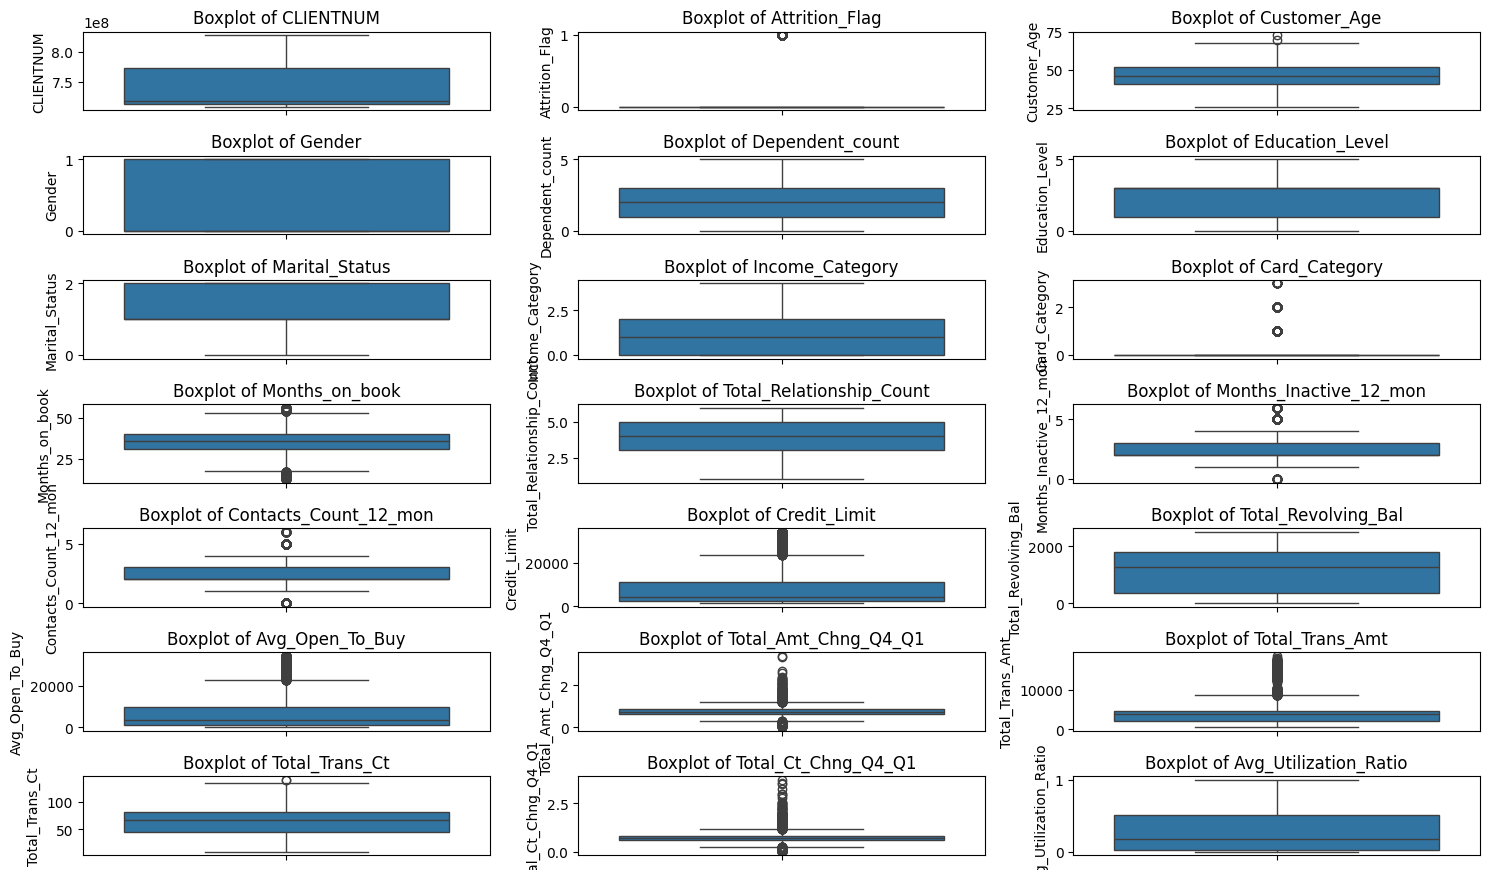

In [11]:
import seaborn as sns

# Boxplot을 사용하여 각 수치형 변수에 대한 이상치 분석
plt.figure(figsize=(15, 10))

# 각 변수에 대해 boxplot 생성
for i, column in enumerate(df_encoded.columns, 1):
    plt.subplot(len(df_encoded.columns) // 3 + 1, 3, i)
    sns.boxplot(data=df_encoded, y=column)
    plt.title(f'Boxplot of {column}')
    plt.tight_layout()

plt.show()

In [12]:
def remove_outliers(df, columns):
    df_cleaned = df.copy()

    for col in columns:
        if df[col].dtype in [np.float64, np.int64]:  # 해당 열이 수치형 데이터인지 확인
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # 이상치가 아닌 데이터만 선택하여 해당 열에 대해 갱신
            df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]

    # 인덱스 재설정
    df_cleaned.reset_index(drop=True, inplace=True)
    return df_cleaned

# 이상치 제거를 원하는 열 선택
columns_to_clean = ['Total_Trans_Amt', 'Avg_Open_To_Buy']

# 선택한 열에 대해 이상치 제거 후 데이터 프레임 반환
cleaned_df = remove_outliers(df_encoded, columns_to_clean)

# 결과 확인
print(df_encoded.shape, cleaned_df.shape)

(10127, 21) (8458, 21)


In [13]:
cleaned_df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,0,45,1,3,1,1,2,0,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,0,49,0,5,3,2,0,0,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,0,51,1,3,3,1,3,0,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,0,40,0,4,1,1,0,0,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,0,40,1,3,0,1,2,0,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [14]:
# 무의미한 변수 제거
df=cleaned_df.drop(columns=['CLIENTNUM'])

### 상관관계 분석

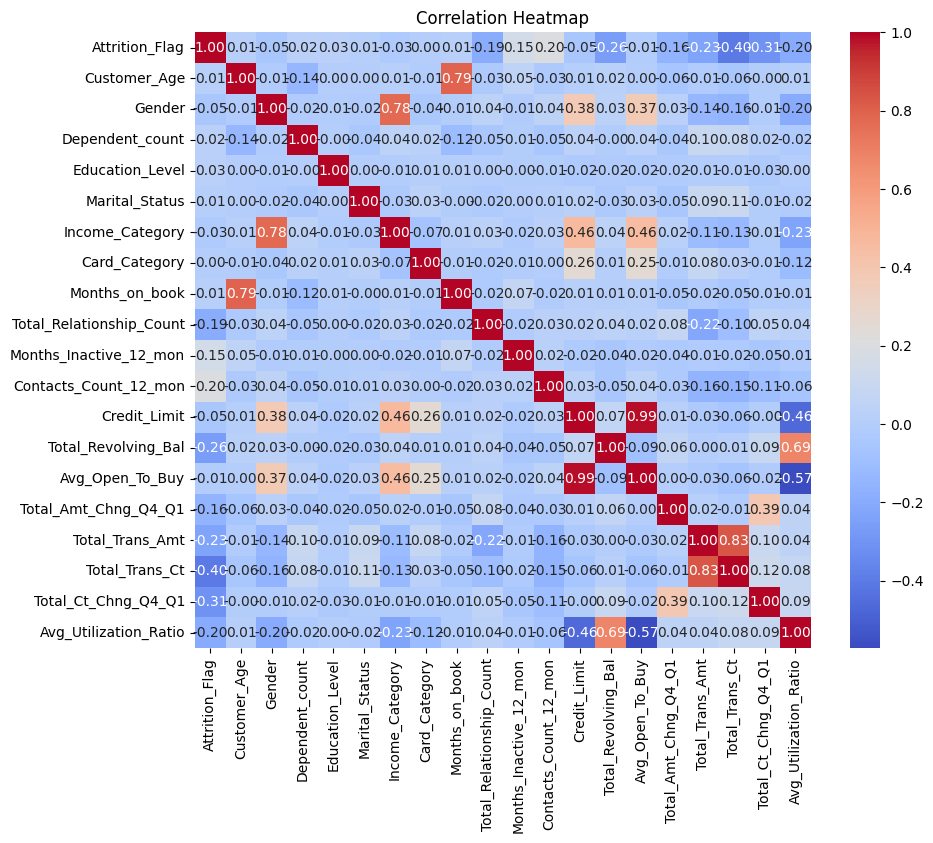

In [15]:
import seaborn as sns
corr = df.corr()

# 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Heatmap')
plt.show()

### Scale + 데이터 분할

In [16]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=['Attrition_Flag'])  # 독립 변수들
y = df['Attrition_Flag']  # 종속 변수

# 2. 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. 데이터 스케일링
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Modeling

다음 모델의 성능을 비교해주세요.
- Decision Tree  -> Accuracy = 0.9208
- Random Forest -> 0.9639
- Adaboost -> 0.9569
- Gradientboosting -> 0.9645
- Soft voting -> 0.9504
- Blending -> 0.9533
- Stacking -> 0.9634
-> 단일 의사결정나무 모델로는 decision tree가 가장 단순하며, 다른 모델 대비 정확도가 낮다. 따라서 overfitting 가능성이 높고 데이터 변동에 민감하다.
-> 앙상블 모델이 전반적으로 decision tree보다 높은 정확도를 보임.
-> 이 데이터셋에서는 gradient boosting이 가장 정확도가 높으며, 그다음은 random forest와 stacking이 있습니다. 단일 decision tree는 가장 낮은 성능을 보여 앙상블 기법의 일반화 성능 향상 효과를 확인할 수 있음.


### Decision Tree

In [17]:
clf = DecisionTreeClassifier(random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.9208


### Random Forest

In [18]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 모델 평가
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.9639


### Adaboost

In [19]:
# AdaBoost 모델 훈련
model = AdaBoostClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 모델 평가
accuracy = accuracy_score(y_test, y_pred)


print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.9569


### Gradientboosting

In [20]:
# Gradient Boosting 모델 훈련
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 모델 평가
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.9645


### soft voting(DecisionTree, RandomForest, AdaBoost, GradientBoosting)

In [21]:
from sklearn.ensemble import VotingClassifier

dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
ada = AdaBoostClassifier(n_estimators=100, random_state=42)
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

voting_clf = VotingClassifier(
    estimators=[
        ('dt',dt),
        ('rf', rf),
        ('ada', ada),
        ('gb', gb)
    ],
    voting='soft'  # soft voting: 확률 평균, hard voting: 다수결
)

voting_clf.fit(X_train, y_train)
y_pred = voting_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Voting (Soft) Model Accuracy: {accuracy:.4f}')

Voting (Soft) Model Accuracy: 0.9504


### Blending(RandomForest, SVC → LogisticRegression)


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np

# 1. train을 다시 train_blend, blend로 분할
X_tr, X_blend, y_tr, y_blend = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

# 2. 개별 모델 학습 (train_blend로)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
svc = SVC(probability=True, random_state=42)
rf.fit(X_tr, y_tr)
svc.fit(X_tr, y_tr)

# 3. 블렌딩 세트에서 예측값 생성
rf_blend_pred = rf.predict_proba(X_blend)
svc_blend_pred = svc.predict_proba(X_blend)
blend_features = np.hstack([rf_blend_pred, svc_blend_pred])

# 4. 메타모델 학습 (블렌딩 세트의 예측값을 feature로)
meta_model = LogisticRegression()
meta_model.fit(blend_features, y_blend)

# 5. 테스트셋 예측
rf_test_pred = rf.predict_proba(X_test)
svc_test_pred = svc.predict_proba(X_test)
test_features = np.hstack([rf_test_pred, svc_test_pred])
y_pred_blend = meta_model.predict(test_features)

accuracy_blend = accuracy_score(y_test, y_pred_blend)
print(f"Blending Model Accuracy: {accuracy_blend:.4f}")

Blending Model Accuracy: 0.9533


### stacking(RandomForest, SVC → LogisticRegression)

In [23]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('svc', SVC(probability=True, random_state=42))
]

# 최종 모델로 Logistic Regression 사용
stacking_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression()
)

# 모델 학습
stacking_clf.fit(X_train, y_train)

# 예측
y_pred = stacking_clf.predict(X_test)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"Stacking Model Accuracy: {accuracy:.4f}")

Stacking Model Accuracy: 0.9634
